# Machine Learning Engineer Nanodegree
## Capstone Project
Qixiang Zhang  
Jul 3rd, 2018

### Sensitivity Analysis

In [1]:
##### EXPLORE #########==================
# data exploring and basic libraries
import random
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import deque as dq

# Pretty display for notebooks
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

### Load the datasets

In [2]:
sensi = pd.read_csv("sensitivity_result.csv", index_col=0)

In [3]:
sensi

,cuisine,bench,rfc,mnb,lr,mlp,lr_ova,svm,sdg_ova,xgb,lgbm
0,greek,1.0,1.0,1.0,0.9,1.0,0.0,1.0,0.3,1.0,1.0
1,southern_us,0.8,0.7,0.0,0.0,0.4,0.1,0.8,0.3,0.6,0.0
2,filipino,0.8,0.9,0.8,1.0,0.9,0.9,0.7,1.0,1.0,1.0
3,indian,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,jamaican,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,spanish,1.0,0.7,0.0,0.0,0.0,0.2,0.7,0.0,0.7,0.0
6,italian,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,mexican,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,chinese,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,british,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6


start from here

In [4]:
sensi['Mean'] = sensi.mean(axis=1)

In [5]:
print('Model      Accuracy')
sensi.mean(axis=0)

Model      Accuracy


bench      0.940
rfc        0.935
mnb        0.740
lr         0.770
mlp        0.785
lr_ova     0.725
svm        0.940
sdg_ova    0.730
xgb        0.945
lgbm       0.740
Mean       0.825
dtype: float64

In [7]:
sensi = sensi.sort_values(by=['Mean'])

In [8]:
sensi_array = sensi.drop(['cuisine'],axis=1).values

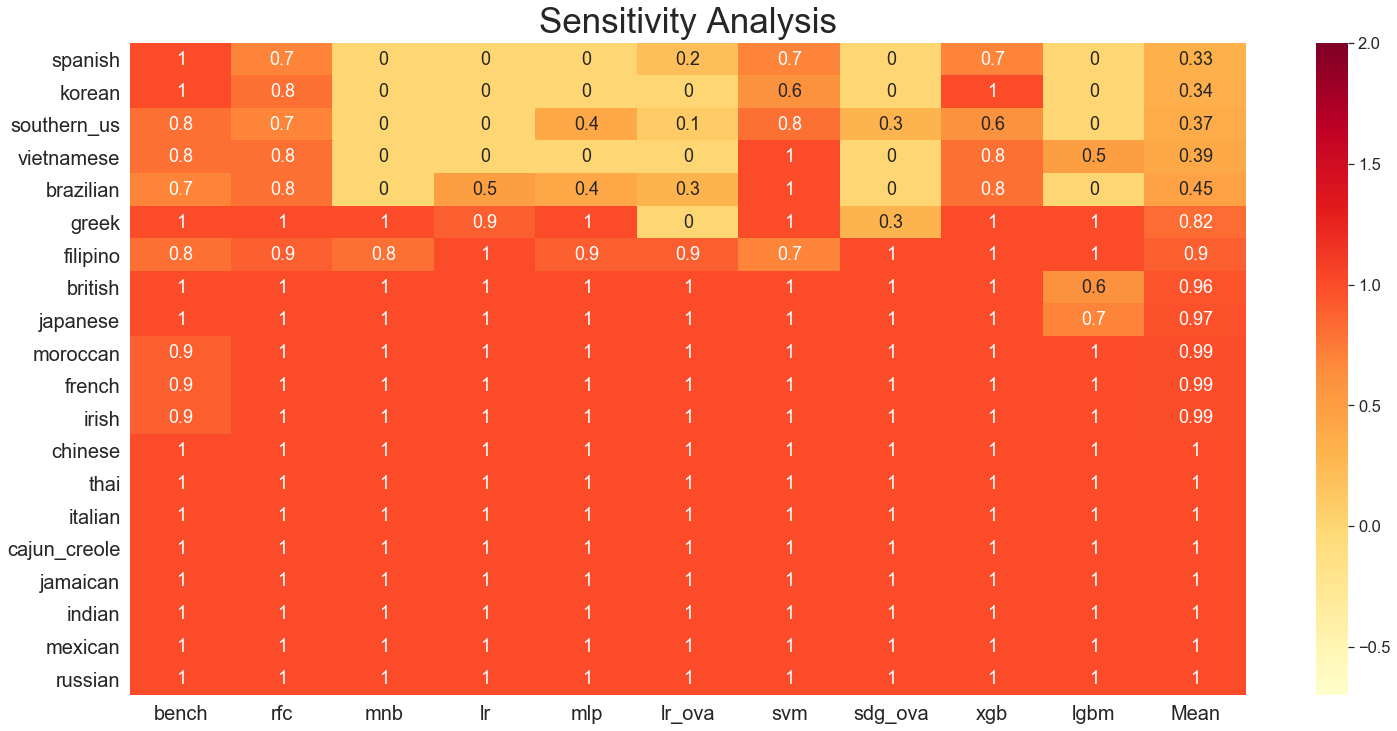

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(25, 12), tight_layout=0)

g = sns.heatmap(sensi_array, annot=True, 
                xticklabels=list(sensi.columns.values[1:]), 
                yticklabels=sensi['cuisine'], 
                robust=1, vmin=-0.7, vmax=2,
                cmap='YlOrRd')
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 20)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20)

ax.set_title(label='Sensitivity Analysis', fontdict={'fontsize':35}, pad=10)

plt.show()

### Model Evaluation and justification (sorted by Kaggle's score):

| **Model** | **Grid Search Validation Score** |**Kaggle's Accuracy Score after submission** |
|----|----|----|
| SVM (One-Vs-All) | 0.8082 | 0.81114 |
| Neural Network by Keras | 0.7975 | 0.79444 |
| Logistic Regression (Multinomial) | 0.7896 | 0.78660 |
| Logistic Regression (One-Vs-All) | 0.7958 | 0.78620 |
| Neural Network (MLP Classifier by sklearn) | 0.7811 | 0.78278 |
| Linear Classifiers with SGD | 0.7797 | 0.78057 |
| XGBoost | 0.7710 | 0.77896 |
| Random Forest (tuned) | 0.7595 | 0.75905 |
| LightGBM | never finished running | 0.74064 |
| Naive Bayes (Multinomial) | 0.7424 | 0.73793 |
| **Random Forest (benchmark)** | -- | **0.70002** |


#### plot it in a spreadsheet

plt the distribution prettier

Text(0.5,1,'Recipe Distribution')

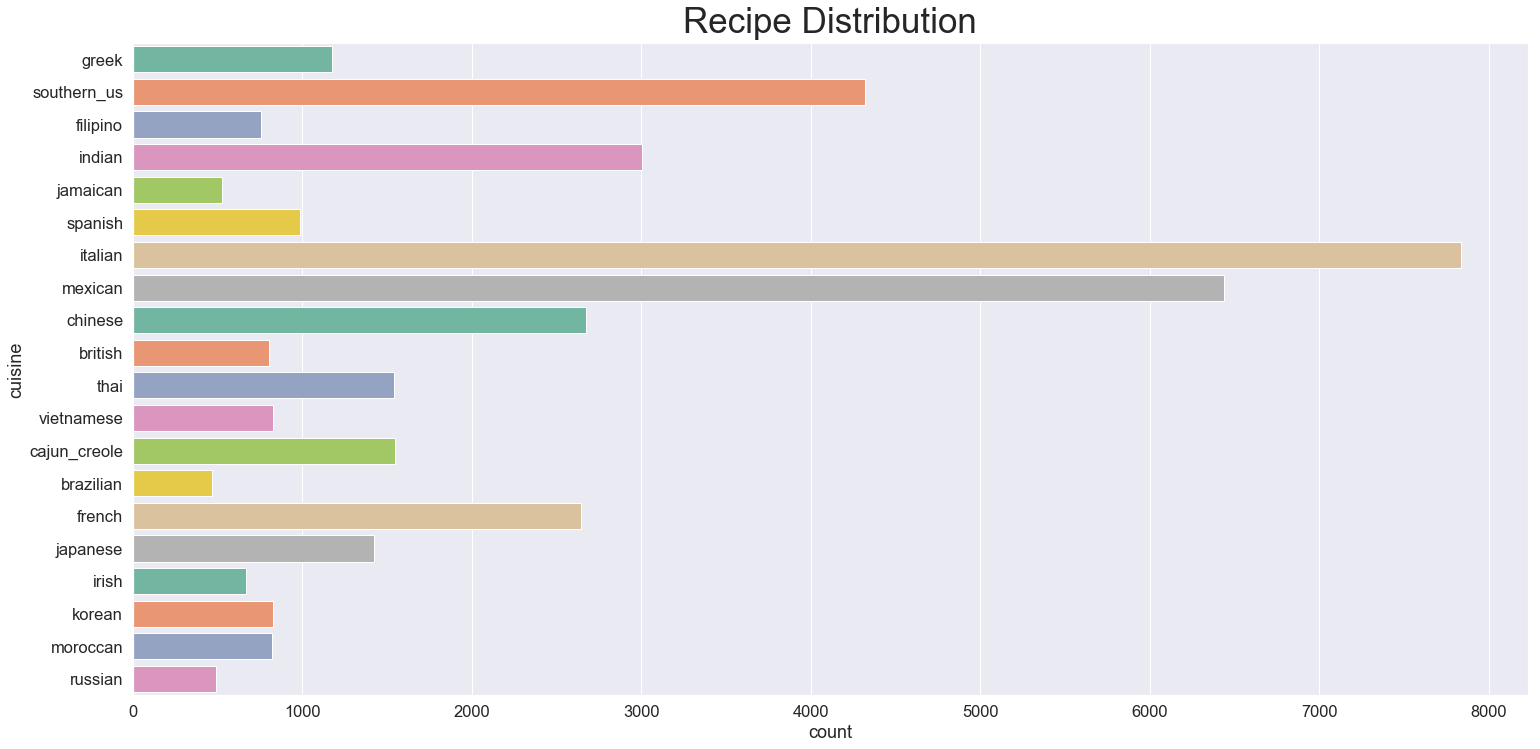

In [10]:
rawdf_tr = pd.read_json(path_or_buf='raw_data/train.json')
sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 1, figsize=(25, 12), tight_layout=0)
ax = sns.countplot(y='cuisine', data=rawdf_tr, palette ='Set2')
ax.set_title(label='Recipe Distribution', fontdict={'fontsize':35}, pad=10)
